In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('/home/kuntik/dev/datasets/dental_rtg_merged2/annotations.json') as f:
    data = json.load(f)

### Plot the distribution of boxes dimensions as histogram

/tmp/ipykernel_102615/3409157553.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


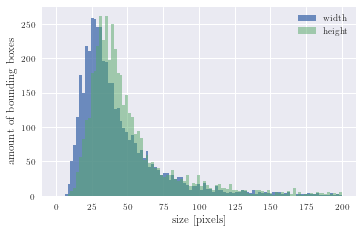

In [67]:
bins = np.linspace(0,200, 100)
plt.style.use('seaborn')
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "arial",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}
plt.rcParams.update(tex_fonts)

width = []
height = []

for ann in data['annotations']:
    _,_,w,h = ann['bbox']

    width.append(w)
    height.append(h)

fig, ax = plt.subplots(1,1, figsize=set_size(407))
ax.hist(width, bins, alpha=0.8, label='width')
ax.hist(height, bins, alpha=0.5, label='height')
ax.set_xlabel('size [pixels]')
ax.set_ylabel('amount of bounding boxes')
ax.legend()
fig.savefig('dataset_histogram.png', format='png', bbox_inches='tight')
fig.show()

### Plot distribution of dental caries over images

/tmp/ipykernel_102615/2206211401.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


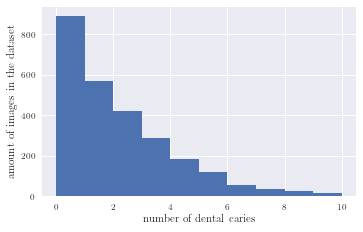

In [66]:
images = [0 for i in range(len(data['images']))]
for ann in data['annotations']:
    images[ann['image_id']] += 1

fig, ax = plt.subplots(1,1, figsize=set_size(407))
bins = np.linspace(0,10,11)
plt.hist(images, bins)
ax.set_xlabel('number of dental caries')
ax.set_ylabel('amount of images in the dataset')
fig.savefig('caries_histogram.png', format='png', bbox_inches='tight')
fig.show()
plt.show()

In [32]:
np_height = np.asarray(height)
np_width = np.asarray(width)
print(f"width min : {min(width)}, width max : {max(width)}, height min : {min(height)}, height max : {max(height)}")
print(f"width mean : {np_width.mean()}, width std : {np_width.std()}, height mean : {np_height.mean()}, height std : {np_height.std()}")

width min : 8.0, width max : 384.0, height min : 9.0, height max : 315.0
width mean : 46.64407431693989, width std : 38.45277585254492, height mean : 52.23377923497268, height std : 36.144835418387245


### Charts based on the data from weights and biases, the purpose is only to plot the data

/tmp/ipykernel_102615/4238108787.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


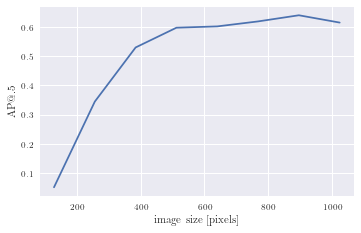

In [75]:
map = [0.0522, 0.345, 0.53, 0.5975, 0.602, 0.619, 0.64, 0.615]
img_size = [128  * i for i in range(1,9)]

fig, ax = plt.subplots(1,1, figsize=set_size(407))
ax.plot(img_size, map)
ax.set_xlabel('image size [pixels]')
ax.set_ylabel('AP@.5')
fig.savefig('img_size_dependency.pdf', format='pdf', bbox_inches='tight')
fig.show()

/tmp/ipykernel_102615/2576065680.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


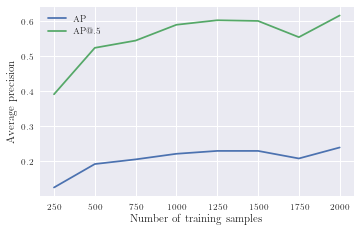

In [82]:
ap = [0.1253, 0.1923, 0.2056, 0.2216, 0.2298, 0.2298, 0.2082, 0.2396, ]
ap50 = [0.3916, 0.5243, 0.545, 0.5902, 0.6031, 0.6011, 0.5548, 0.6167]
size = [250 * i for i in range(1,9)]
fig, ax = plt.subplots(1,1, figsize=set_size(407))
ax.plot(size, ap, label='AP')
ax.plot(size, ap50, label='AP@.5')
ax.set_xlabel('Number of training samples')
ax.set_ylabel('Average precision')
ax.legend()
fig.savefig('training_set_dependency.pdf', format='pdf', bbox_inches='tight')
fig.show()